In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/My Drive/ey_models/'

In [ ]:
model_names = [
    'LSTM-AE SWaT',
    'LSTM-AE HAI',
    'Seq2Seq SWaT',
    'Seq2Seq HAI',
    'AE SWaT',
    'AE HAI',
    'b-AE SWaT',
    'b-AE HAI',
    'b-LSTM SWaT',
    'b-LSTM HAI'
]
file_paths = [
    path + 'roc_curve_LSTM_SWAT_final16.csv',
    path + 'roc_curve_LSTM_HAI_final16.csv',
    path + 'roc_curve_seq2seq_SWaT_final.csv',
    path + 'roc_curve_seq2sq_HAI_final2.csv',
    path + 'roc_curve_Autoencoder_SWaT_final01.csv',
    path + 'roc_curve_autoencoder_HAI.csv',
    path + 'roc_curve_Autoencoder_SWaT_baseline.csv',
    path + 'roc_curve_autoencoder_HAI_baseline_final.csv',
    path + 'roc_curve_LSTM_SWAT_baseline.csv',
    path + 'roc_curve_LSTM_HAI_baseline.csv'
]
line_styles = ['-', '--', '-.', ':', '-', '--',':','-.','-','--']

In [ ]:
# Function to plot ROC curves
def plot_roc_curves(model_names, file_paths, line_styles, title, filter_keyword=None):
    plt.figure(figsize=(7, 7))

    for model_name, file_path, line_style in zip(model_names, file_paths, line_styles):
        # Filter by keyword if provided
        if filter_keyword and filter_keyword not in model_name:
            continue

        # Load the data
        data = pd.read_csv(file_path)

        # Check if the expected columns are present
        if 'fpr' not in data.columns or 'tpr' not in data.columns:
            print(f"Error: 'fpr' or 'tpr' columns not found in {file_path}")
            continue

        # Extract FPR and TPR values
        fpr = data['fpr']
        tpr = data['tpr']

        # Calculate AUC
        model_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, linestyle=line_style, label=f'{model_name} (AUC = {model_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

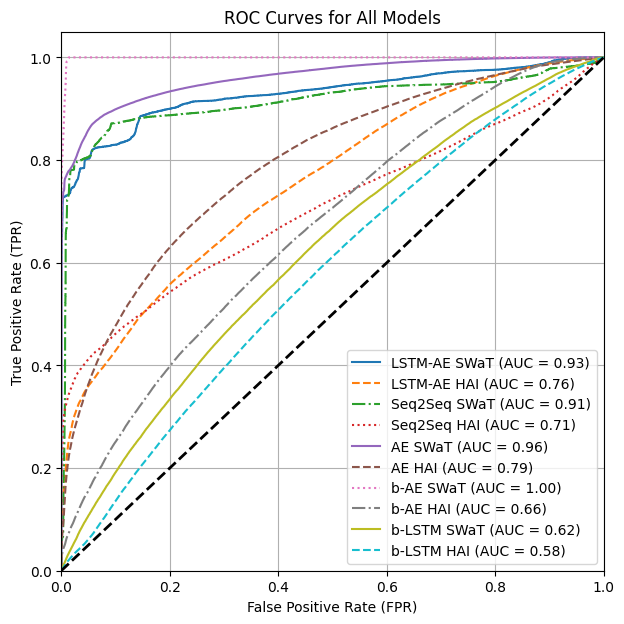

In [ ]:
# Plot both dataset
plot_roc_curves(model_names, file_paths, line_styles, 'ROC Curves for All Models')

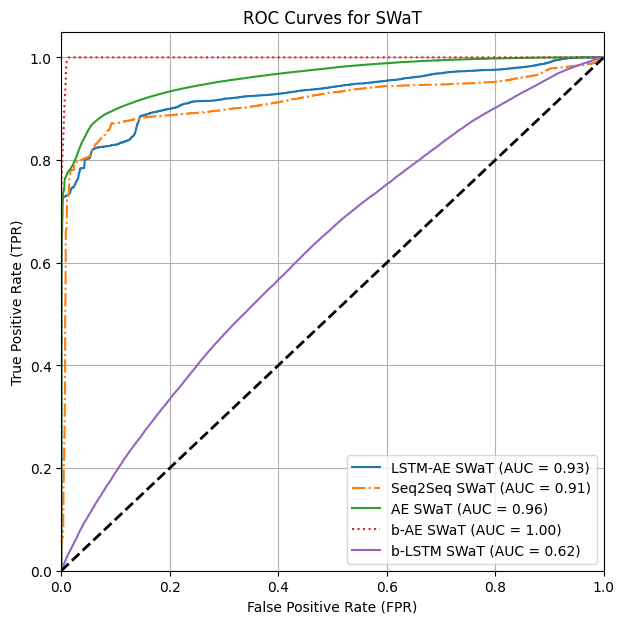

In [ ]:
# Plot SWaT dataset
plot_roc_curves(model_names, file_paths, line_styles, 'ROC Curves for SWaT', filter_keyword='SWaT')

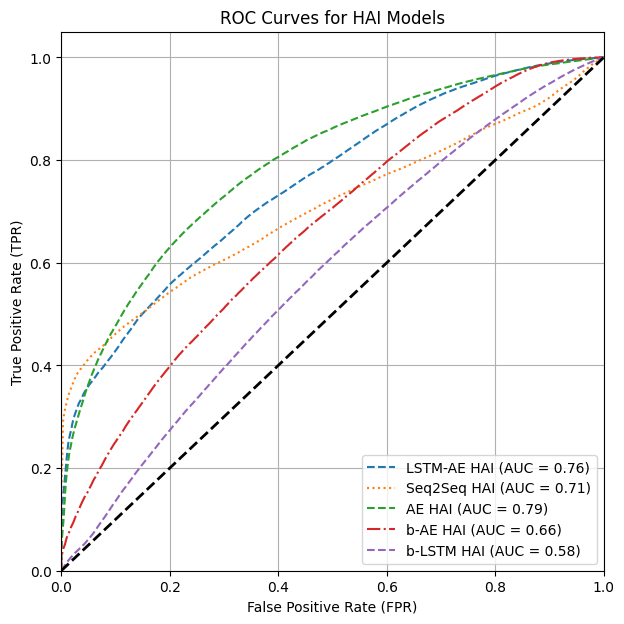

In [ ]:
# Plot HAI dataset
plot_roc_curves(model_names, file_paths, line_styles, 'ROC Curves for HAI Models', filter_keyword='HAI')